In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU, Conv2D, Dropout, Flatten, Input
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
extractPath = 'C:\\Users\\kaizi\\Desktop\\jupyter\\DeepLearning\\INDA\\CDF-INDA'

In [4]:
import os
# List the files in the extracted directory
image_files = [f for f in os.listdir(extractPath) if os.path.isfile(os.path.join(extractPath, f))]

## Load Image Data

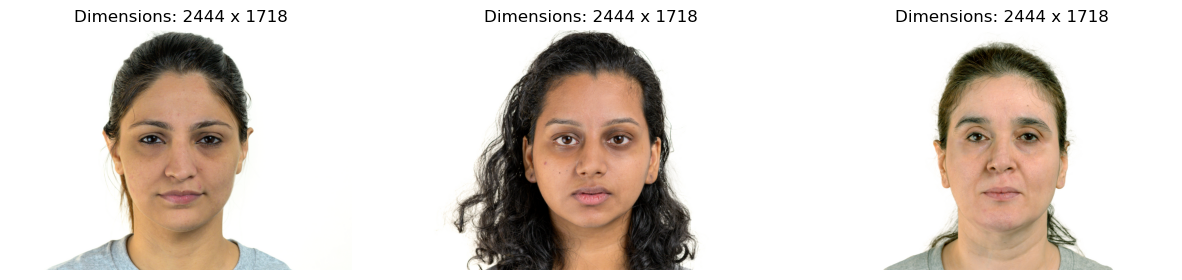

In [5]:
from PIL import Image
# Load the first 3 images
images = []
image_dims = []
for i in range(min(3, len(image_files))):
    img_path = os.path.join(extractPath, image_files[i])
    img = Image.open(img_path)
    images.append(img)
    image_dims.append(img.size)  # (width, height)

# Plot the first 3 images with their dimensions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img, dim in zip(axes, images, image_dims):
    ax.imshow(img)
    ax.set_title(f'Dimensions: {dim[0]} x {dim[1]}')
    ax.axis('off')

plt.show()

In [6]:
data_path = 'C:\\Users\\kaizi\\Desktop\\jupyter\\DeepLearning\\INDA\\'

# Define data generator for custom data
# Create an instance of the ImageDataGenerator with rescaling and zoom range
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None  # No labels required for GANs
)

Found 138 images belonging to 1 classes.


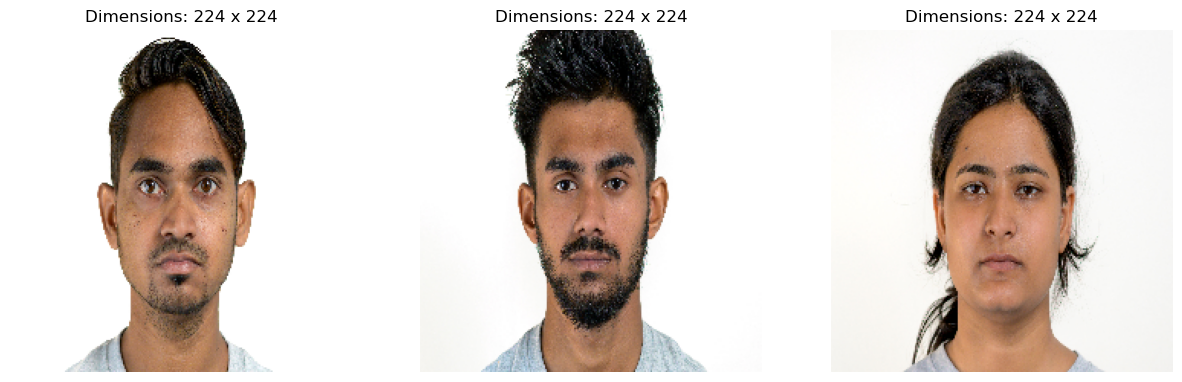

In [7]:
# Get the first batch of images
images_batch = next(train_generator)
first_three_images = images_batch[:3]

# Plot the first 3 images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img in zip(axes, first_three_images):
    ax.imshow(img)
    ax.set_title(f'Dimensions: 224 x 224')
    ax.axis('off')

plt.show()

## Build Generator and Discriminator

In [8]:
# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256 * 28 * 28, activation='relu', input_dim=100))
    model.add(Reshape((28, 28, 256)))
    model.add(Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh'))
    print("Generator architecture")
    model.summary()
    print()
    return model


In [9]:
# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(224, 224, 3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    print("Discriminator architecture")
    model.summary()
    print()
    return model


In [10]:
# Build and compile the discriminator
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

Generator architecture


C:\Users\kaizi\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200704)              │      20,271,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 56, 56, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 112, 112, 64)        │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 224, 224, 3)         │           4,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,300,099 (81.25 MB)

 Trainable params: 21,300,099 (81.25 MB)

 Non-trainable params: 0 (0.00 B)


Discriminator architecture


C:\Users\kaizi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 112, 112, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 56, 56, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         401,409 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 611,201 (2.33 MB)

 Trainable params: 611,201 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Verify the models' output shapes
print("Generator output shape:", generator.output_shape)
print("Discriminator input shape:", discriminator.input_shape)

Generator output shape: (None, 224, 224, 3)
Discriminator input shape: (None, 224, 224, 3)


## Training

In [12]:
# GAN model: combining Generator and Discriminator
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
gan = Model(z, validity)
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')


In [13]:
# Define constants
epochs = 100
batch_size = 32
codings_size = 100
save_interval = 100

In [14]:
# Save generated images
def save_images(epoch, generator, examples=3, dim=(1, 5), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale images 0 - 1
    
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')
    plt.close()

In [15]:
def load_data(generator, batch_size):
    X = []
    for _ in range(batch_size):
        img = next(generator)
        X.append(img[0])
    X = np.array(X)
    return X

In [16]:
# Training loop
for epoch in range(epochs):
    # Train Discriminator
    imgs = load_data(train_generator, batch_size)  # Load a batch of real images
    
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate noise for fake images
    gen_imgs = generator.predict(noise)  # Generate fake images using the generator

    valid = np.ones((batch_size, 1))  # Labels for real images
    fake = np.zeros((batch_size, 1))  # Labels for fake images
    
    d_loss_real = discriminator.train_on_batch(imgs, valid)  # Train discriminator on real images
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)  # Train discriminator on fake images
 
    d_loss = 0.5 * (d_loss_real + d_loss_fake)  # Calculate the average discriminator loss
   
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate noise for new fake images
    gan.train_on_batch(noise, valid)  # Train generator using the GAN model
   
    # Print progress
    if epoch%10 == 0:
        print(f"Epoch {epoch + 1}: DESC loss: {d_loss}")
    
    # If at save interval, save generated image samples
    if epoch % save_interval == 0:
        save_images(epoch, generator, examples=5)

print("Training completed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


C:\Users\kaizi\anaconda3\lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1: DESC loss: 0.7214453816413879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Epoch 2: DESC loss: 0.7132570147514343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Epoch 3: DESC loss: 0.7200325727462769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 4: DESC loss: 0.716320276260376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Epoch 5: DESC loss: 0.7182116508483887
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 6: DESC loss: 0.7177397012710571
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Epoch 7: DESC loss: 0.7183290123939514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Epoch 8: DESC loss: 0.719645619392395
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Epoch 9: DESC loss: 0.7189597487449646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Epoch 10: DESC loss: 0.719995379447937
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 11: DESC loss: 0.72064208984375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Epoch 12: DESC loss: 0.7210106253623962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Epoch 13: DESC loss: 0.7238

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Epoch 61: DESC loss: 0.9894908666610718
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Epoch 62: DESC loss: 0.9942491054534912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Epoch 63: DESC loss: 0.9988349676132202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Epoch 64: DESC loss: 1.003507137298584
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Epoch 65: DESC loss: 1.008009433746338
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 66: DESC loss: 1.0125155448913574
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Epoch 67: DESC loss: 1.016861081123352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Epoch 68: DESC loss: 1.0212500095367432
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Epoch 69: DESC loss: 1.0253231525421143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Epoch 70: DESC loss: 1.0295205116271973
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Epoch 71: DESC loss: 1.0339000225067139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Epoch 72: DESC loss: 1.0379481315612793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Epoch 73: DESC l

In [20]:
def generate_and_save_images(generator, examples=9):
    noise = np.random.normal(0, 1, (examples, 100))  # Generate noise
    gen_imgs = generator.predict(noise)  # Generate images using the generator

    fig, axs = plt.subplots(1, examples, figsize=(10, 10))
    for i in range(examples):
        img = gen_imgs[i, :, :, 0]  # Get the ith generated image
        img_rescaled = np.clip((img + 1) * 127.5, 0, 255).astype(np.uint8)  # Rescale image to [0, 255]
        img_rescaled = np.resize(img_rescaled, (176, 224))  # Resize image to 244x176

        axs[i].imshow(img_rescaled, cmap='gray')  # Display the image
        axs[i].axis('off')  # Hide axes
    
    plt.tight_layout()
    plt.savefig("generated_images_after_training.png")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


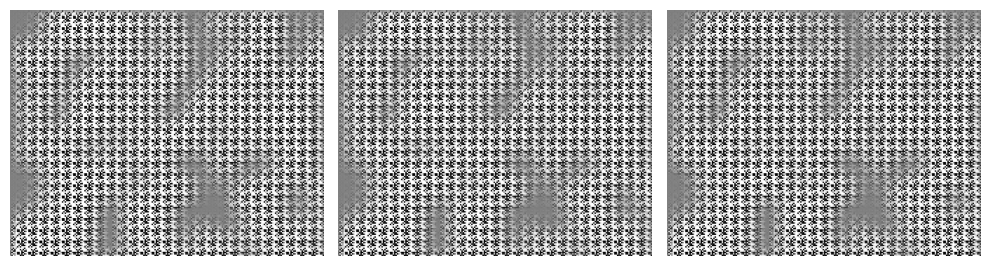

In [21]:
generate_and_save_images(generator, examples=3)

## Save Generator and Discriminator Model

In [22]:
generator.save('generator_model.keras')
discriminator.save('discriminator_model.keras')
gan.save('gan_model.keras')